<a href="https://colab.research.google.com/github/jincy-p-janardhanan/imbalanced-fraud-detection/blob/main/imbalanced-fraud-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import gdown
# url = 'https://drive.google.com/uc?export=download&confirm=6gh6&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV'
# output = 'Fraud.csv'
# gdown.download(url, output, quiet=False)
# !cp /content/Fraud.csv /content/drive/MyDrive

# Load data

In [3]:
import pandas as pd

In [4]:
# df = pd.read_csv('Fraud.csv')
df = pd.read_csv('/content/drive/MyDrive/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Data analysis

size, columns and datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Null value-check

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Identifying data stats

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Fraud and flagged fraud

In [8]:
print('Number of fraudulent transactions \t: {}'.format(len(df[df['isFraud']==1])))
print('Number of non-fraudulent transactions \t: {}'.format(len(df[df['isFraud']==0])))
print('\nNumber of transactions flagged fraud \t: {}'.format(len(df[df['isFlaggedFraud']==1])))
print('Number of transactions flagged non-fraud: {}'.format(len(df[df['isFlaggedFraud']==0])))

Number of fraudulent transactions 	: 8213
Number of non-fraudulent transactions 	: 6354407

Number of transactions flagged fraud 	: 16
Number of transactions flagged non-fraud: 6362604


=> Highly skewed data.

In [9]:
fraud_ratio = df['isFraud'].value_counts()/len(df)
flaggedFraud_ratio =  df['isFlaggedFraud'].value_counts()/len(df)

In [10]:
print(f'Fraud ratio \n{fraud_ratio} \n\nFlagged fraud ratio \n{flaggedFraud_ratio}')

Fraud ratio 
0    0.998709
1    0.001291
Name: isFraud, dtype: float64 

Flagged fraud ratio 
0    0.999997
1    0.000003
Name: isFlaggedFraud, dtype: float64


In [11]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [12]:
fraudby_type = df[df['isFraud']==1].groupby('type')['isFraud'].count()
flaggedFraudby_type = df[df['isFlaggedFraud']==1].groupby('type')['isFlaggedFraud'].count()

In [13]:
print(f'Fraud per transaction type: \n{fraudby_type}\n \nFlagged fraud per transaction type: \n{flaggedFraudby_type}')

Fraud per transaction type: 
type
CASH_OUT    4116
TRANSFER    4097
Name: isFraud, dtype: int64
 
Flagged fraud per transaction type: 
type
TRANSFER    16
Name: isFlaggedFraud, dtype: int64


Only Transfers are flagged as fraud.<br>
Only Cashouts and Transfers are fraud.<br>
?? Do we really need data from other transaction types?

### Fraud
>In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

Analyze fraud data

In [14]:
df[df['isFraud']==1].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,8213.000000,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8213.0,8213.000000
mean,368.413856,1.467967e+06,1.649668e+06,1.923926e+05,5.442496e+05,1.279708e+06,1.0,0.001948
std,216.388690,2.404253e+06,3.547719e+06,1.965666e+06,3.336421e+06,3.908817e+06,0.0,0.044097
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
25%,181.000000,1.270913e+05,1.258224e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
50%,367.000000,4.414234e+05,4.389835e+05,0.000000e+00,0.000000e+00,4.676420e+03,1.0,0.000000
75%,558.000000,1.517771e+06,1.517771e+06,0.000000e+00,1.478287e+05,1.058725e+06,1.0,0.000000
max,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.0,1.000000


Transactions that empties funds in one account

In [15]:
len(df[(df['amount'] == df['oldbalanceOrg'])])

8034

In [16]:
len(df[(df['amount'] == df['oldbalanceOrg']) & (df['isFraud'] == 1)] )

8034

So all transactions that empty funds are marked as fraud.<br>
But, there are 8213 fraud transactions in total. <br>
=> Remaining transactions could be outliers?

In [17]:
df_outliers = df[(df['amount'] != df['oldbalanceOrg']) & (df['isFraud'] == 1)]

In [18]:
df_outliers.groupby('type')['type'].count()

type
CASH_OUT     25
TRANSFER    154
Name: type, dtype: int64

In [19]:
df_outliers[df_outliers['type'] == 'CASH_OUT'].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,25.000000,25.000000,25.000000,25.0000,2.500000e+01,2.500000e+01,25.0,25.0
mean,56.880000,220121.416800,17031.663200,11950.7044,5.806669e+05,1.185674e+06,1.0,0.0
std,78.015127,158136.453984,69138.559766,59753.5220,1.613350e+06,2.341533e+06,0.0,0.0
min,1.000000,23292.300000,0.000000,0.0000,0.000000e+00,4.061122e+04,1.0,0.0
25%,13.000000,95428.320000,0.000000,0.0000,0.000000e+00,2.250277e+05,1.0,0.0
50%,19.000000,181728.110000,0.000000,0.0000,1.139700e+04,4.070058e+05,1.0,0.0
75%,38.000000,314251.580000,0.000000,0.0000,3.989313e+05,6.784196e+05,1.0,0.0
max,231.000000,577418.980000,340830.430000,298767.6100,7.962205e+06,9.291620e+06,1.0,0.0


Seems like most of the fraud cashout outliers are transactions in which Original account has 0 balance before and after the transaction; and Destination account has balance in the order of $10^5$ after the transaction.

=> Outlier shows a pattern and thus cannot be ignored.

In [20]:
df_outliers[df_outliers['type'] == 'TRANSFER'].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,154.000000,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,154.0,154.000000
mean,439.097403,9.565122e+06,1.928838e+07,1.006063e+07,2.855618e+04,5.909128e+04,1.0,0.038961
std,213.665941,1.919552e+06,1.081729e+07,1.032873e+07,2.048429e+05,3.562933e+05,0.0,0.194133
min,4.000000,1.231949e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
25%,271.500000,1.000000e+07,1.227122e+07,2.455224e+06,0.000000e+00,0.000000e+00,1.0,0.000000
50%,425.000000,1.000000e+07,1.595579e+07,6.359678e+06,0.000000e+00,0.000000e+00,1.0,0.000000
75%,646.000000,1.000000e+07,2.370846e+07,1.493847e+07,0.000000e+00,0.000000e+00,1.0,0.000000
max,741.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.122337e+06,3.217684e+06,1.0,1.000000


Here also, the outliers cannot be ignored because they show a pattern. 

Most of the transfers attempted to transfer an amount of $1 \times 10^7$ to an empty Destination account and failed.

### Flagged fraud
>An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

Analyzing flagged fraud data

In [21]:
df[df['isFlaggedFraud'] == 1].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,16.000000,1.600000e+01,1.600000e+01,1.600000e+01,16.0,16.0,16.0,16.0
mean,537.562500,4.861598e+06,7.817869e+06,7.817869e+06,0.0,0.0,1.0,1.0
std,181.895196,3.572499e+06,6.972669e+06,6.972669e+06,0.0,0.0,0.0,0.0
min,212.000000,3.538742e+05,3.538742e+05,3.538742e+05,0.0,0.0,1.0,1.0
25%,415.500000,2.242749e+06,3.013980e+06,3.013980e+06,0.0,0.0,1.0,1.0
50%,601.500000,4.234245e+06,4.923043e+06,4.923043e+06,0.0,0.0,1.0,1.0
75%,678.750000,7.883451e+06,1.212835e+07,1.212835e+07,0.0,0.0,1.0,1.0
max,741.000000,1.000000e+07,1.958504e+07,1.958504e+07,0.0,0.0,1.0,1.0


*Attempt to transfer $\implies$ Original and destination accounts are not modified.*

In [22]:
len(df[  (df['oldbalanceOrg'] == df['newbalanceOrig']) \
       & (df['oldbalanceDest'] == df['newbalanceDest']) \
       & (df['amount']>200.000) \
       & (df['type']=='TRANSFER') ])

21

In [23]:
len(df[df['isFlaggedFraud'] == 1])

16

$\implies 21 - 16 = 5$ missing values or outliers in isFlaggedFraud.

In [24]:
dff_outliers = df[  (df['oldbalanceOrg'] == df['newbalanceOrig']) \
       & (df['oldbalanceDest'] == df['newbalanceDest']) \
       & (df['amount']>200.000) \
       & (df['type']=='TRANSFER') \
       & (df['isFlaggedFraud']==0)]
dff_outliers.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.00000,5.000000,5.0,5.0,5.0,5.0,5.0,5.0
mean,16.80000,237475.474000,0.0,0.0,0.0,0.0,0.0,0.0
std,16.11521,161578.156092,0.0,0.0,0.0,0.0,0.0,0.0
min,1.00000,18931.590000,0.0,0.0,0.0,0.0,0.0,0.0
25%,12.00000,133711.480000,0.0,0.0,0.0,0.0,0.0,0.0
50%,12.00000,271161.740000,0.0,0.0,0.0,0.0,0.0,0.0
75%,15.00000,342317.150000,0.0,0.0,0.0,0.0,0.0,0.0
max,44.00000,421255.410000,0.0,0.0,0.0,0.0,0.0,0.0


i.e. Failed transfer attempts from empty accounts are not flagged as fraud. <br>
Again, the outliers has a pattern and must be retained.

## Merchant transactions

Given,
> there is not information for customers that start with M (Merchants).

Finding transactions initiated by merchants

In [25]:
df[df['nameOrig'].str.startswith('M')].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


$\implies$ No merchants initiated transactions.

In [26]:
df[df['nameDest'].str.startswith('M')].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.151495e+06,2.151495e+06,2.151495e+06,2.151495e+06,2151495.0,2151495.0,2151495.0,2151495.0
mean,2.443782e+02,1.305760e+04,6.821683e+04,6.183789e+04,0.0,0.0,0.0,0.0
std,1.426951e+02,1.255645e+04,1.989911e+05,1.969915e+05,0.0,0.0,0.0,0.0
min,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
25%,1.560000e+02,4.383820e+03,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
50%,2.490000e+02,9.482190e+03,1.053000e+04,0.000000e+00,0.0,0.0,0.0,0.0
75%,3.350000e+02,1.756122e+04,6.088300e+04,4.965413e+04,0.0,0.0,0.0,0.0
max,7.180000e+02,2.386380e+05,4.368662e+07,4.367380e+07,0.0,0.0,0.0,0.0


$\implies$ 2151495 transactions were destined towards merchant accounts. <br>
However, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud - are all 0; i.e these are the missing data.

In [27]:
df_missing = df[df['nameDest'].str.startswith('M')]

In [28]:
df_missing['type'].unique()

array(['PAYMENT'], dtype=object)

$\implies$ all missing data are payments.

# Data preprocessing

## Fix missing data

Interpolating oldbalance and updating new balance with payment

In [29]:
import numpy as np
df.loc[df['nameDest'].str.startswith('M'), ['oldbalanceDest']] = np.NaN
print('{} rows updated with NaN'.format(df['oldbalanceDest'].isnull().sum()))

2151495 rows updated with NaN


In [30]:
df=df.interpolate()

Find if there are missing data after interpolate

In [31]:
df[df['oldbalanceDest'].isnull()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,NaN,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,NaN,0.0,0,0


These are the 1st two rows in the dataset, and couldn't be interpolated. So let's assign oldbalanceDest for these to zero.

In [32]:
df.loc[df['oldbalanceDest'].isnull(), 'oldbalanceDest'] = 0

In [33]:
df.isnull().values.any()

False

Now, we have fixed missing data in oldbalanceDest column. <br>
Let's try to find payments that doesn't involve merchants to infer update criteria for newbalanceDest.

In [34]:
df[(df['type']=='PAYMENT') & (df.nameDest.str.get(0) != 'M')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


$\implies$ There are no payments that doesn't involve Merchants. <br>
So, let's use a general update criteria for updating newbalanceDest.
$$\text{newbalanceDest} = \text{oldbalanceDest} + \text{amount}$$

In [35]:
newbalanceDest = df.loc[df.nameDest.str.get(0) == 'M', 'oldbalanceDest'] + df.loc[df.nameDest.str.get(0) == 'M','amount']

In [36]:
df.loc[df['nameDest'].str.get(0) == 'M', ['newbalanceDest']] = newbalanceDest

Let's see if we need to update isFraud column. <br>
(No need of updating isFlaggedFraud column since only TRANSFERs are flagged fraud.)

In [37]:
len(df[(df['nameDest'].str.get(0) == 'M') & (df['amount'] == df['oldbalanceOrg'])])

0

$\implies$ No transactions to merchants try to empty funds in Original account. <br>
$\therefore$ None of them need to be marked as isFraud. <br>
So we have fixed all missing data.

However, this means fixing missing data did not contribute to the classification goal. Still, only transaction types CASH_OUT and TRANSFER contribute to Fraud classification.

So, it may be safe to ignore other transaction types. <br>
(Try two models - one that ignores other transaction types and one that doesn't ignore other transaction types.)

In [38]:
df[df['nameDest'].str.get(0) == 'M'].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.151495e+06,2.151495e+06,2.151495e+06,2.151495e+06,2.151495e+06,2.151495e+06,2151495.0,2151495.0
mean,2.443782e+02,1.305760e+04,6.821683e+04,6.183789e+04,1.161337e+06,1.174395e+06,0.0,0.0
std,1.426951e+02,1.255645e+04,1.989911e+05,1.969915e+05,2.614824e+06,2.614912e+06,0.0,0.0
min,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-02,0.0,0.0
25%,1.560000e+02,4.383820e+03,0.000000e+00,0.000000e+00,1.105357e+05,1.240366e+05,0.0,0.0
50%,2.490000e+02,9.482190e+03,1.053000e+04,0.000000e+00,4.304567e+05,4.436661e+05,0.0,0.0
75%,3.350000e+02,1.756122e+04,6.088300e+04,4.965413e+04,1.266756e+06,1.279647e+06,0.0,0.0
max,7.180000e+02,2.386380e+05,4.368662e+07,4.367380e+07,3.368401e+08,3.368669e+08,0.0,0.0


The dataframe stats after fixing missing data.

In [39]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.493403e+06,1.622113e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.647435e+06,3.891930e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,1.271562e+05,1.814925e+05,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,5.065537e+05,5.929597e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,1.533432e+06,1.678439e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Remove unwanted

We do not need customer id to make predictions from the dataset. So let's drop columns nameOrig and nameDest.

In [40]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


## Normalization

In [42]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.493403e+06,1.622113e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.647435e+06,3.891930e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,1.271562e+05,1.814925e+05,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,5.065537e+05,5.929597e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,1.533432e+06,1.678439e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Values of columns step, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest vary by a very large scale. So we can apply mean normalization.

In [43]:
cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df['step'] = df['step'] - df['step'].mean() / (df['step'].std())
df[cols] = df[cols].apply(lambda x: (np.log(x+10)))

In [44]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,-0.710067,PAYMENT,9.195190,12.044412,11.984842,2.302585,9.195190,0,0
1,-0.710067,PAYMENT,7.535980,9.964536,9.872756,2.302585,7.535980,0,0
2,-0.710067,TRANSFER,5.252273,5.252273,2.302585,2.302585,2.302585,1,0
3,-0.710067,CASH_OUT,5.252273,5.252273,2.302585,9.961379,2.302585,1,0
4,-0.710067,PAYMENT,9.365474,10.634990,10.305475,10.112316,10.499926,0,0


In [45]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.416872e+02,1.084252e+01,8.178673e+00,6.672674e+00,1.205322e+01,1.275373e+01,1.290820e-03,2.514687e-06
std,1.423320e+02,1.809876e+00,4.691891e+00,5.229820e+00,3.762009e+00,2.795486e+00,3.590480e-02,1.585775e-03
min,-7.100673e-01,2.302585e+00,2.302585e+00,2.302585e+00,2.302585e+00,2.302585e+00,0.000000e+00,0.000000e+00
25%,1.542899e+02,9.502978e+00,2.302585e+00,2.302585e+00,1.175325e+01,1.210902e+01,0.000000e+00,0.000000e+00
50%,2.372899e+02,1.122367e+01,9.562264e+00,2.302585e+00,1.313541e+01,1.329290e+01,0.000000e+00,0.000000e+00
75%,3.332899e+02,1.224880e+01,1.158362e+01,1.187943e+01,1.424303e+01,1.433338e+01,0.000000e+00,0.000000e+00
max,7.412899e+02,1.834213e+01,1.790292e+01,1.771920e+01,1.969049e+01,1.969094e+01,1.000000e+00,1.000000e+00


Let's make df2 that ignores transaction types other than transfers and cash outs.

In [46]:
df2 = df[(df['type'].isin(['CASH_OUT', 'TRANSFER']))].copy(deep=True)

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            float64
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 211.4+ MB


In [48]:
df2['step'] = df2['step'] - df2['step'].mean() / (df2['step'].std())

In [49]:
df2.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06
mean,2.386012e+02,1.192809e+01,6.367012e+00,3.169231e+00,1.188522e+01,1.355135e+01,2.964544e-03,5.775321e-06
std,1.416191e+02,1.231621e+00,4.114653e+00,2.662251e+00,4.150795e+00,1.651896e+00,5.436687e-02,2.403183e-03
min,-2.406858e+00,2.302585e+00,2.302585e+00,2.302585e+00,2.302585e+00,2.302585e+00,0.000000e+00,0.000000e+00
25%,1.515931e+02,1.132640e+01,2.302585e+00,2.302585e+00,1.176044e+01,1.269863e+01,0.000000e+00,0.000000e+00
50%,2.325931e+02,1.205100e+01,5.749266e+00,2.302585e+00,1.322802e+01,1.362685e+01,0.000000e+00,0.000000e+00
75%,3.285931e+02,1.263396e+01,1.034197e+01,2.302585e+00,1.436704e+01,1.456797e+01,0.000000e+00,0.000000e+00
max,7.395931e+02,1.834213e+01,1.790292e+01,1.771920e+01,1.969049e+01,1.969094e+01,1.000000e+00,1.000000e+00


# Data visualization

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

> step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

Here we have normalized step.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


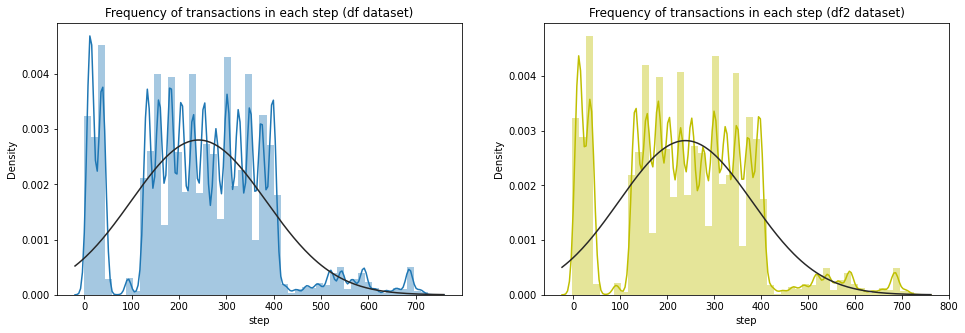

In [51]:
plt.rcParams['figure.figsize'] =(16, 5)

plt.subplot(1, 2, 1)
sns.distplot(df.step, fit=norm)
plt.title('Frequency of transactions in each step (df dataset)', fontsize = 12)

plt.subplot(1, 2, 2)
sns.distplot(df2.step, fit=norm, color='y')
plt.title('Frequency of transactions in each step (df2 dataset)', fontsize = 12)

plt.show()

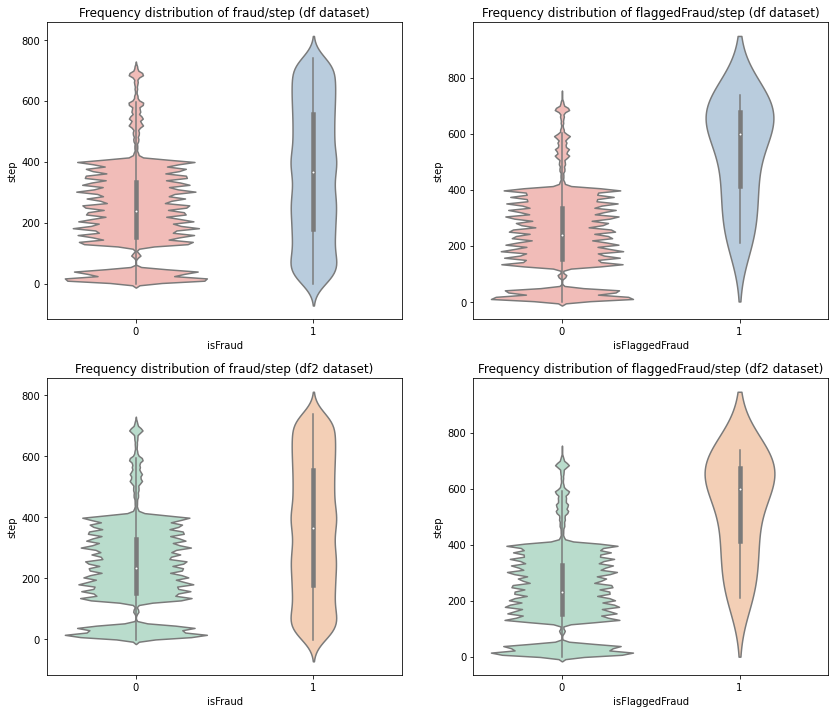

In [52]:
plt.rcParams['figure.figsize'] =(14, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x='isFraud',y='step',data=df, palette='Pastel1')
plt.title('Frequency distribution of fraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x='isFlaggedFraud',y='step',data=df, palette='Pastel1')
plt.title('Frequency distribution of flaggedFraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x='isFraud',y='step',data=df2, palette='Pastel2')
plt.title('Frequency distribution of fraud/step (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x='isFlaggedFraud',y='step',data=df2, palette='Pastel2')
plt.title('Frequency distribution of flaggedFraud/step (df2 dataset)', fontsize = 12)

plt.show()

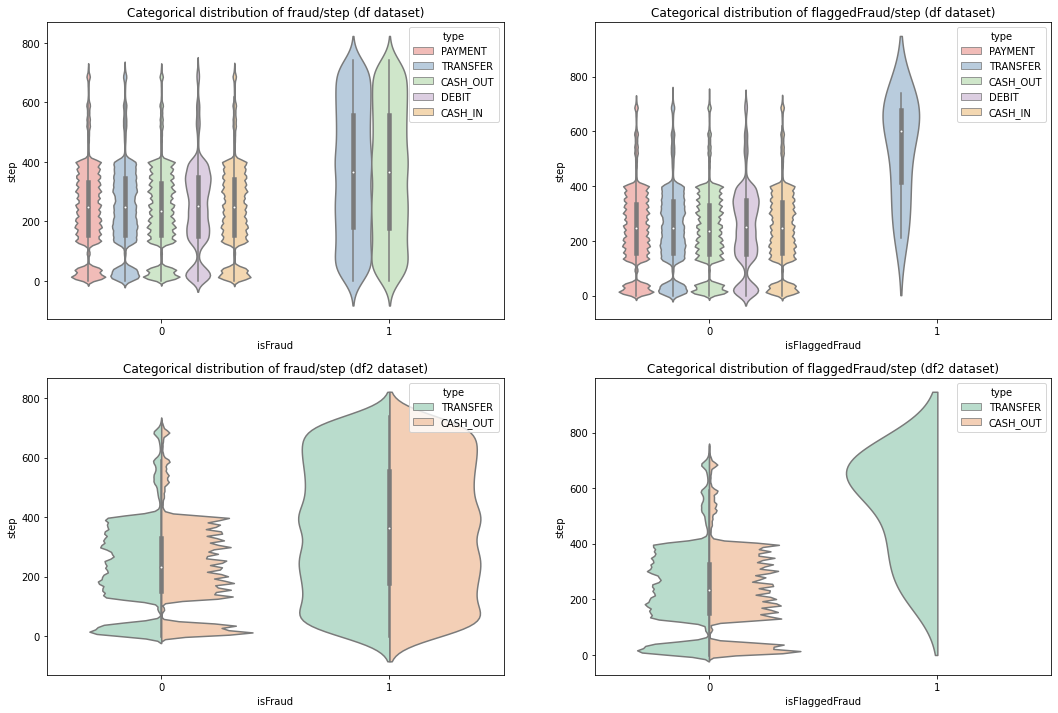

In [53]:
plt.rcParams['figure.figsize'] =(18, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x='isFraud',y='step',data=df, hue='type', palette='Pastel1')
plt.title('Categorical distribution of fraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x='isFlaggedFraud',y='step',data=df, hue='type', palette='Pastel1')
plt.title('Categorical distribution of flaggedFraud/step (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x='isFraud',y='step',data=df2, hue='type', split=True, palette='Pastel2')
plt.title('Categorical distribution of fraud/step (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x='isFlaggedFraud',y='step',data=df2, hue='type', split=True, palette='Pastel2')
plt.title('Categorical distribution of flaggedFraud/step (df2 dataset)')

plt.show()

Both transfer and cashout contribute almost equally towards fraud.<br> df2 has better captured the distribution of transactions that contributed towards flaggedfraud.

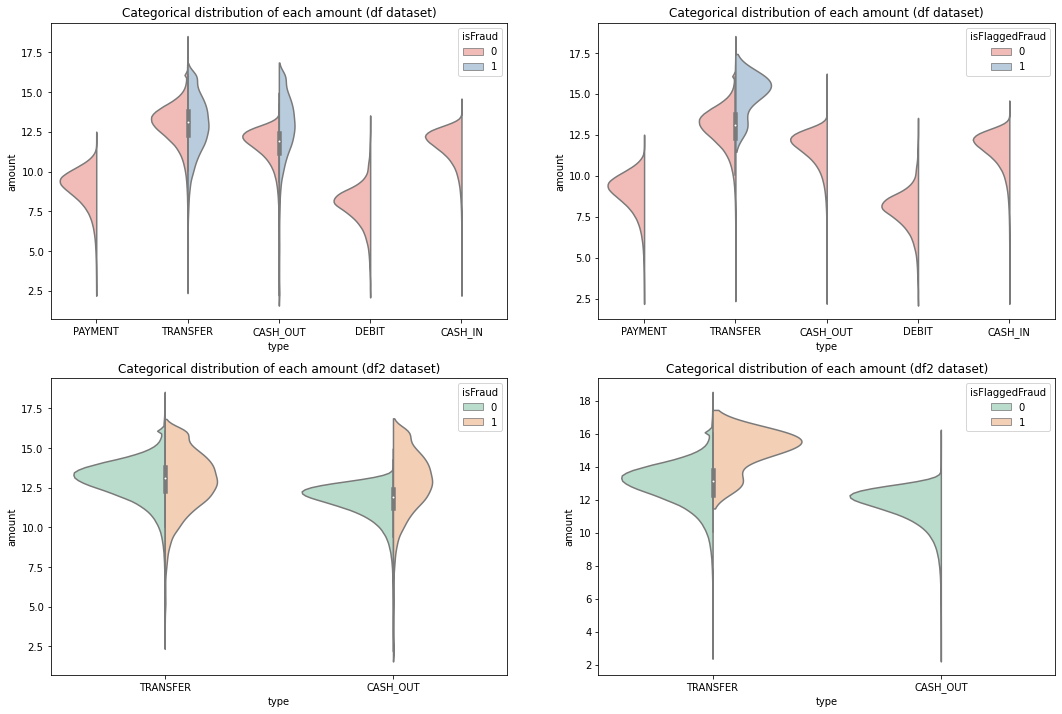

In [54]:
plt.rcParams['figure.figsize'] = (18, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x = 'type', y = 'amount', data=df, hue='isFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of each amount (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x = 'type', y = 'amount', data=df, hue='isFlaggedFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of each amount (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x = 'type', y = 'amount', data=df2, hue='isFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of each amount (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x = 'type', y = 'amount', data=df2, hue='isFlaggedFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of each amount (df2 dataset)', fontsize = 12)

plt.show()

# Feature engineering

oldbalance, newbalance and amount are interdependent variables. So, we can combine them into a single a variable.

In [55]:
df['diffOrg']  = df['oldbalanceOrg']  - df['newbalanceOrig'] + df['amount']
df['diffDest'] = df['oldbalanceDest'] - df['newbalanceDest'] + df['amount']

df2['diffOrg']  = df2['oldbalanceOrg']  - df2['newbalanceOrig'] + df2['amount']
df2['diffDest'] = df2['oldbalanceDest'] - df2['newbalanceDest'] + df2['amount']

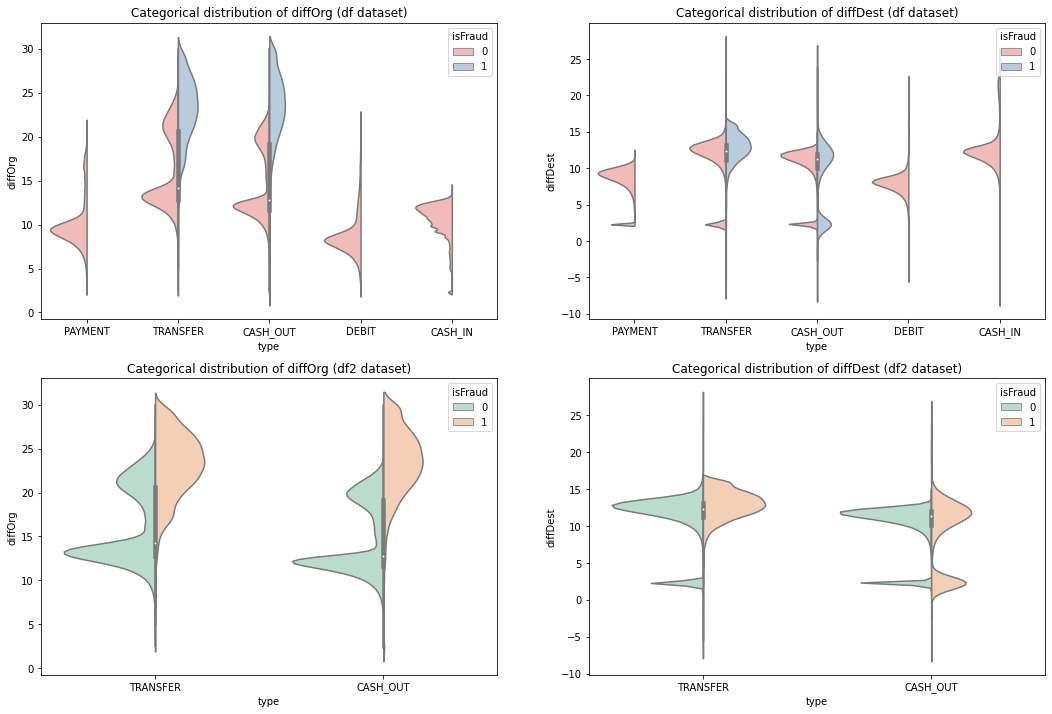

In [56]:
plt.rcParams['figure.figsize'] = (18, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x = 'type', y = 'diffOrg', data=df, hue='isFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of diffOrg (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x = 'type', y = 'diffDest', data=df, hue='isFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of diffDest (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x = 'type', y = 'diffOrg', data=df2, hue='isFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of diffOrg (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x = 'type', y = 'diffDest', data=df2, hue='isFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of diffDest (df2 dataset)', fontsize = 12)

plt.show()

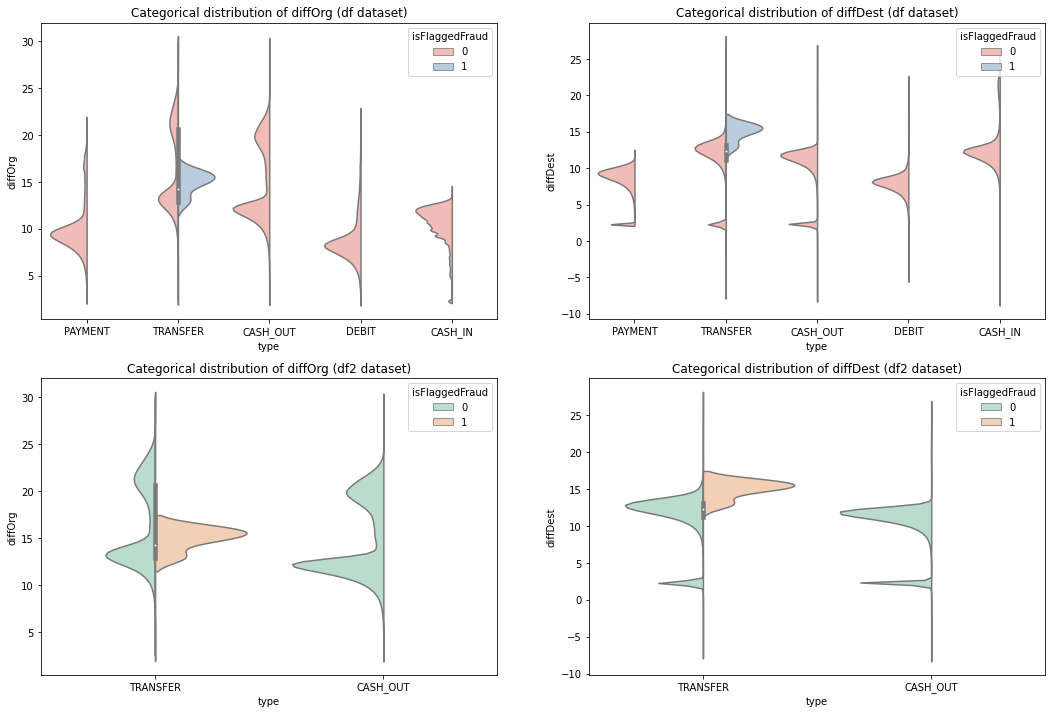

In [57]:
plt.rcParams['figure.figsize'] = (18, 12)

plt.subplot(2, 2, 1)
sns.violinplot(x = 'type', y = 'diffOrg', data=df, hue='isFlaggedFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of diffOrg (df dataset)', fontsize = 12)

plt.subplot(2, 2, 2)
sns.violinplot(x = 'type', y = 'diffDest', data=df, hue='isFlaggedFraud', split=True, palette='Pastel1')
plt.title('Categorical distribution of diffDest (df dataset)', fontsize = 12)

plt.subplot(2, 2, 3)
sns.violinplot(x = 'type', y = 'diffOrg', data=df2, hue='isFlaggedFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of diffOrg (df2 dataset)', fontsize = 12)

plt.subplot(2, 2, 4)
sns.violinplot(x = 'type', y = 'diffDest', data=df2, hue='isFlaggedFraud', split=True, palette='Pastel2')
plt.title('Categorical distribution of diffDest (df2 dataset)', fontsize = 12)

plt.show()

Seems like the new features has some interesting relationships with fraud and flaggedfraud transactions

# SMOTE oversampling for imbalanced data

We had noted that the dataset is highly imbalanced.

In [58]:
print(f'Fraud ratio \n{fraud_ratio} \n\nFlagged fraud ratio \n{flaggedFraud_ratio}')

Fraud ratio 
0    0.998709
1    0.001291
Name: isFraud, dtype: float64 

Flagged fraud ratio 
0    0.999997
1    0.000003
Name: isFlaggedFraud, dtype: float64


So to give better results, we can use the SMOTE technique.

In [59]:
from imblearn.over_sampling import SMOTE

Preparing datasets

In [60]:
X = df
Y = df['isFraud']          # target label
X = pd.concat([X, pd.get_dummies(X['type'])], axis = 'columns')       # one-hot columns for transaction type
X = X.drop(['isFraud', 'type'], axis=1)

X2 = df2
Y2 = df2['isFraud']
X2 = pd.concat([X2, pd.get_dummies(X2['type'])], axis = 'columns')
X2 = X2.drop(['isFraud', 'type'], axis=1)

In [61]:
len(X), len(X2)

(6362620, 2770409)

SMOTE resampling

In [62]:
X, Y = SMOTE().fit_resample(X, Y)
X2, Y2 = SMOTE().fit_resample(X2, Y2)

In [63]:
len(X), len(X2)

(12708814, 5524392)

In [64]:
list(Y).count(1), list(Y2).count(1)

(6354407, 2762196)

In [65]:
list(Y).count(0), list(Y2).count(0)

(6354407, 2762196)

With smote resampling, now our dataset size has almost doubled and has balanced classes.

# Training

## Train, validation and test Split

In [66]:
from sklearn.model_selection import train_test_split

Set random state for reproducibility

In [67]:
random_state = 55

Get list of random permutations

In [68]:
p = np.random.RandomState(seed=random_state).permutation(len(X))
p2 = np.random.RandomState(seed=random_state).permutation(len(X2))

Random shuffle dataset before splitting

In [69]:
X, Y = X.iloc[p], Y.iloc[p]
X2, Y2 = X2.iloc[p2], Y2.iloc[p2]

Train, validation, test split

Train: 80%, validation:10%, test:10%

In [70]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = random_state)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = random_state)

x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = random_state)
x2_val, x2_test, y2_val, y2_test = train_test_split(x2_test, y2_test, test_size = 0.5, random_state = random_state)

Before training, let's free up some RAM space.

In [71]:
import gc

In [72]:
del df, df2, df_missing, df_outliers, dff_outliers, X, Y, X2, Y2, cols

In [73]:
gc.collect()

23812

## Training the classifier


In [74]:
from xgboost import XGBClassifier

In [75]:
model = XGBClassifier(tree_method = "gpu_hist", random_state=random_state)
model2 = XGBClassifier(tree_method = "gpu_hist", random_state=random_state)

In [76]:
model.fit(x_train, y_train)
model2.fit(x2_train, y2_train)

XGBClassifier(random_state=55, tree_method='gpu_hist')

In [77]:
gc.collect()

65

# Evaluation

Let's define a function that returns all evaluation metrics at once.

In [78]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, f1_score

def evaluate(trainedmodel, x, y):
  '''
    To evaluate model performance
  '''
  y_pred   = trainedmodel.predict(x)
  f1       = f1_score(y, y_pred)
  report   = classification_report(y, y_pred)
  acc      = accuracy_score(y, y_pred)
  roc_auc  = roc_auc_score(y, y_pred)

  eval = {'y_pred': y_pred, 
          'f1_score': f1,
          'accuracy':acc,
          'roc_auc_score': roc_auc
          }

  return eval, report


In [79]:
eval_train, report_train = evaluate(model, x_train, y_train)
eval_val, report_val = evaluate(model, x_val, y_val)

eval2_train, report2_train = evaluate(model2, x2_train, y2_train)
eval2_val, report2_val = evaluate(model2, x2_val, y2_val)

In [80]:
import pprint
pprint._sorted = lambda x:x

In [81]:
print('Evaluation metrics on training data (for df): \n')
pprint.pprint(eval_train)
print('\n',report_train)

print('\n\nEvaluation metrics on val data (for df): \n')
pprint.pprint(eval_val)
print('\n', report_val)

Evaluation metrics on training data (for df): 

{'accuracy': 0.9888765188647131,
 'f1_score': 0.9889569339660917,
 'roc_auc_score': 0.9888763453855397,
 'y_pred': array([1, 1, 1, ..., 0, 0, 1])}

               precision    recall  f1-score   support

           0       1.00      0.98      0.99   5083404
           1       0.98      1.00      0.99   5083647

    accuracy                           0.99  10167051
   macro avg       0.99      0.99      0.99  10167051
weighted avg       0.99      0.99      0.99  10167051



Evaluation metrics on val data (for df): 

{'accuracy': 0.9889108421638217,
 'f1_score': 0.9889934466764395,
 'roc_auc_score': 0.9889087137490279,
 'y_pred': array([0, 0, 1, ..., 0, 1, 0])}

               precision    recall  f1-score   support

           0       1.00      0.98      0.99    635253
           1       0.98      1.00      0.99    635628

    accuracy                           0.99   1270881
   macro avg       0.99      0.99      0.99   1270881
weighted a

In [82]:
print('Evaluation metrics on training data (for df2): \n')
pprint.pprint(eval2_train)
print('\n', report2_train)

print('\n\nEvaluation metrics on val data (for df2): \n')
pprint.pprint(eval2_val)
print('\n', report2_val)

Evaluation metrics on training data (for df2): 

{'accuracy': 0.9864335731108835,
 'f1_score': 0.9865613877876889,
 'roc_auc_score': 0.9864326760500436,
 'y_pred': array([0, 1, 1, ..., 0, 1, 0])}

               precision    recall  f1-score   support

           0       1.00      0.98      0.99   2209546
           1       0.98      1.00      0.99   2209967

    accuracy                           0.99   4419513
   macro avg       0.99      0.99      0.99   4419513
weighted avg       0.99      0.99      0.99   4419513



Evaluation metrics on val data (for df2): 

{'accuracy': 0.9866229574667973,
 'f1_score': 0.9867605431939517,
 'roc_auc_score': 0.9866136044295387,
 'y_pred': array([0, 0, 1, ..., 1, 1, 1])}

               precision    recall  f1-score   support

           0       1.00      0.98      0.99    275945
           1       0.98      1.00      0.99    276494

    accuracy                           0.99    552439
   macro avg       0.99      0.99      0.99    552439
weighted

We have got very impressive metrics on both training and validation sets. However, these results are interesting, because model trained with df has slightly better performance than df2. (Comparing accuracy and f1-scores.)

Also, we have very low bias and variance. So, hopefully, we need not implement furthur hyperparameter tuning. <br>

$\implies$ Let's see test performance of the models.

In [83]:
gc.collect()

204

In [84]:
eval_test, report_test = evaluate(model, x_test, y_test)
eval2_test, report2_test = evaluate(model2, x2_test, y2_test)

In [89]:
print('Evaluation metrics on test data (for df): \n')
pprint.pprint(eval_test)
print('\n', report_test)

print('\n\nEvaluation metrics on test data (for df2): \n')
pprint.pprint(eval2_test)
print('\n', report2_test)

Evaluation metrics on test data (for df): 

{'accuracy': 0.9889376039632318,
 'f1_score': 0.9890120024666136,
 'roc_auc_score': 0.9889411303365628,
 'y_pred': array([1, 1, 0, ..., 1, 1, 1])}

               precision    recall  f1-score   support

           0       1.00      0.98      0.99    635750
           1       0.98      1.00      0.99    635132

    accuracy                           0.99   1270882
   macro avg       0.99      0.99      0.99   1270882
weighted avg       0.99      0.99      0.99   1270882



Evaluation metrics on test data (for df2): 

{'accuracy': 0.9866809065237854,
 'f1_score': 0.9867795026591921,
 'roc_auc_score': 0.9866970433041412,
 'y_pred': array([1, 0, 0, ..., 0, 1, 0])}

               precision    recall  f1-score   support

           0       1.00      0.98      0.99    276705
           1       0.98      1.00      0.99    275735

    accuracy                           0.99    552440
   macro avg       0.99      0.99      0.99    552440
weighted avg

Although very comparable, model has slightly better test performance than model2. (Possibly because of more data.)
Both results are impressive and we have got **99% accuracy and f1-score during test** in both cases.

However, we can infer that 'model' is the best classifier.

In [86]:
best = model

# Feature importances

In [87]:
from xgboost import plot_importance

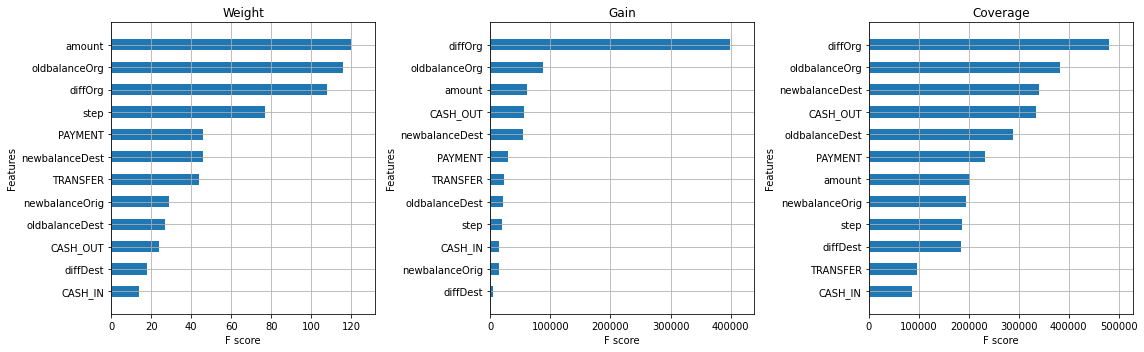

In [88]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

plot_importance(booster=best, importance_type='weight', title='Weight', show_values=False, height=0.5, ax = ax[0])

# plot importances with split mean gain
plot_importance(booster=best, importance_type='gain', title='Gain', show_values=False, height=0.5, ax = ax[1])

# plot importances with sample coverage
plot_importance( booster=best, importance_type='cover', title='Coverage', show_values=False, height=0.5, ax = ax[2])

plt.tight_layout()
plt.show()


From the plot, we can infer that 
- diffOrg has the most gain, i.e. diffOrg contributed most towards model prediction. oldbalanceOrg, amount, and newbalanceDest follows. <br>
$\implies$ The most important features are diffOrg, oldbalanceOrg, amount and newbalanceDest.
- As we look further down the gain plot, we find that PAYMENT contributed more than TRANSFER towards model prediction. This can be attributed towards much greater number of PAYMENT samples in the distribution (than TRANSFER). Also, TRANSFER and PAYMENT has very similar weights. <br>
This result doesn't make sense because all PAYMENTs were non-fraud in the original dataset and did not contribute towards target label.
- The gain of CASH_IN over diffDest is also not very intuitive, because diffDest has more sample cover than CASH_IN and also has more weight. And CASH_IN is another feature that didn't contribute towards target label.
- Even with comparatively high weight for step, it has very less gain. This may be due to the fact that fraud transactions per category has an almost uniform distribution on step - yet, the result is quite unexpected.
- The feature isFlaggedFraud, although present in the dataset, seems to be completely ommitted. XGBoost algorithm might have ignored isFlaggedFraud because it had only very less number of positive examples.
- It seems justified that CASH_OUT has a low weight, because it has a comparatively high sample coverage, but requires only moderate gain for model prediction.

# Fraud prevention

- When updating the infrastructure for preventing fraud transactions, the company should lookout for anomalies in diffOrg.
$$\text{diffOrg = oldbalanceOrg  - newbalanceOrig + amount}$$
- Detecting anomalies in a feature that combines oldbalanceOrg, amount and newbalanceDest, will also be useful for fraud prevention. E.g.
$$\text{suspectRatio} = \frac{\text{oldbalanceOrg + amount}}{\text{newbalanceDest}}$$
- Using a different criteria for flagging fraudulent transactions will also be useful.

After updating the infrastructure, we can retrain the model using new data and compare the model performances to determine whether the updates will be successful towards proactive fraud detection.